In [1]:
library(ggplot2)
library(ggpubr)
library(viridis)
library(gridExtra)
library(dplyr)
library(data.table)
library(magrittr)
library(ggpubr)
library(harmony)
library(umap)
library(Seurat)
load("/Rdatas/SparsityDepthbyCellType.RData")



Loading required package: viridisLite


Attaching package: ‘dplyr’


The following object is masked from ‘package:gridExtra’:

    combine


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


Loading required package: Rcpp



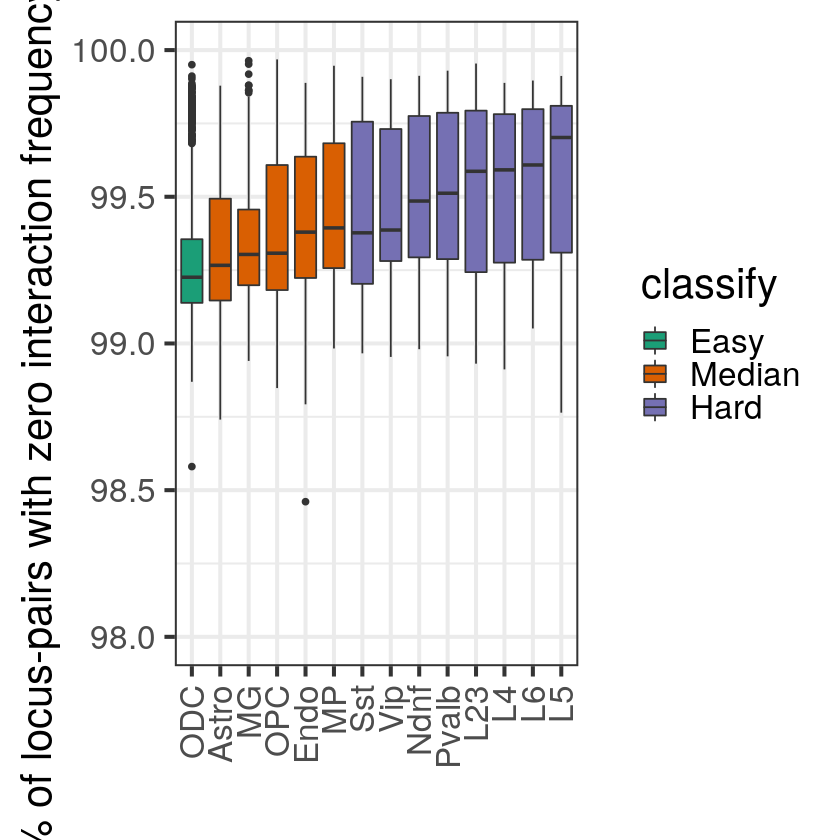

In [16]:
lee2019_sparsity$data %>% 
ggplot(aes(x = factor(cell_type, levels = c("ODC", "Astro", "MG", "OPC", "Endo", "MP", "Sst", "Vip", "Ndnf", "Pvalb", "L23", "L4", "L6", "L5")), y = sparsity100kb * 100, fill = classify)) +
geom_boxplot() +
theme_bw(base_size = 25) +
xlab("") +
ylab("% of locus-pairs with zero interaction frequency (100kb)") +
scale_fill_brewer(palette = "Dark2") + 
rotate_x_text(angle = 90) +
ylim(98, 100)

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Cortical L2–5 Pyramidal Cell' in 'mbcsToSbcs': dot substituted for <e2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Cortical L2–5 Pyramidal Cell' in 'mbcsToSbcs': dot substituted for <80>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Cortical L2–5 Pyramidal Cell' in 'mbcsToSbcs': dot substituted for <93>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Cortical L2–5 Pyramidal Cell' in 'mbcsToSbcs': dot substituted for <e2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Cortical L2–5 Pyramidal Cell' in 'mbcsToSbcs': dot substituted for <80>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 

png 
  2

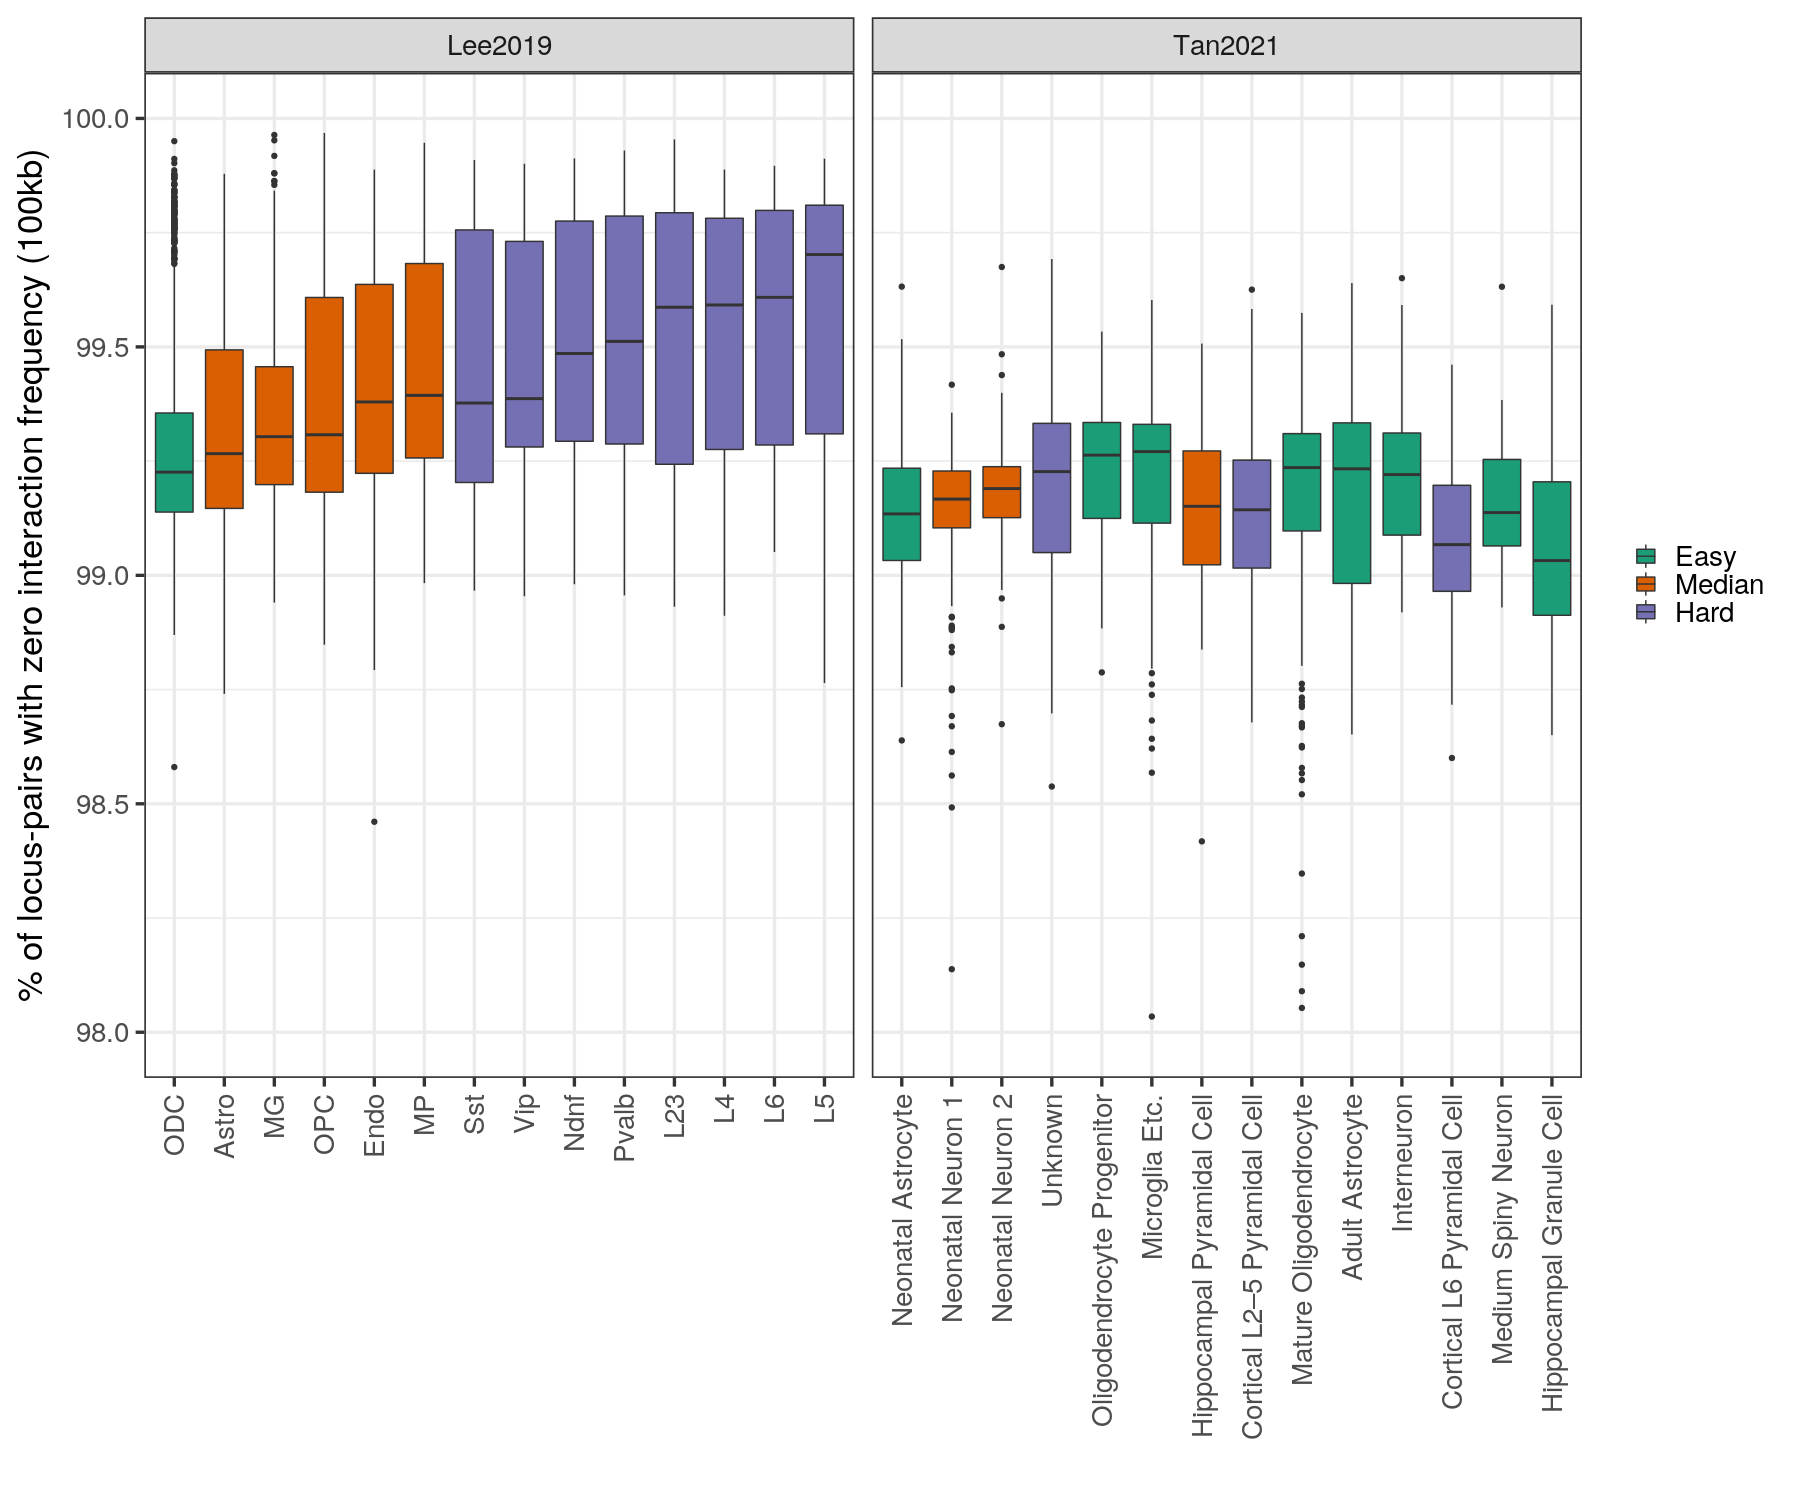

In [32]:
options(repr.plot.width = 18, repr.plot.height = 15, repr.plot.res = 100)

rbind(lee2019_sparsity$data %>% mutate(datasource = "Lee2019") %>% select(cell_type, sparsity100kb, classify, datasource),
      tan2021_sparsity$data %>% mutate(cell_type = V9, datasource = "Tan2021") %>% select(cell_type, sparsity100kb, classify, datasource)) %>% 
ggplot(aes(x = factor(cell_type, levels = c("ODC", "Astro", "MG", "OPC", "Endo", "MP", "Sst", "Vip", "Ndnf", "Pvalb", "L23", "L4", "L6", "L5", unique(tan2021_sparsity$data$V9))), y = sparsity100kb * 100, fill = classify)) +
geom_boxplot() +
facet_grid(~datasource, scales = "free", space = "free") +
theme_bw(base_size = 25) +
xlab("") +
ylab("% of locus-pairs with zero interaction frequency (100kb)") +
scale_fill_brewer(palette = "Dark2") + 
rotate_x_text(angle = 90) +
ylim(98, 100) +
rremove("legend.title")

pdf("Lee2019_Tan2021_100kb_sparsity.pdf", width = 18, height = 15)
rbind(lee2019_sparsity$data %>% mutate(datasource = "Lee2019") %>% select(cell_type, sparsity100kb, classify, datasource),
      tan2021_sparsity$data %>% mutate(cell_type = V9, datasource = "Tan2021") %>% select(cell_type, sparsity100kb, classify, datasource)) %>% 
ggplot(aes(x = factor(cell_type, levels = c("ODC", "Astro", "MG", "OPC", "Endo", "MP", "Sst", "Vip", "Ndnf", "Pvalb", "L23", "L4", "L6", "L5", unique(tan2021_sparsity$data$V9))), y = sparsity100kb * 100, fill = classify)) +
geom_boxplot() +
facet_grid(~datasource, scales = "free", space = "free") +
theme_bw(base_size = 25) +
xlab("") +
ylab("% of locus-pairs with zero interaction frequency (100kb)") +
scale_fill_brewer(palette = "Dark2") + 
rotate_x_text(angle = 90) +
ylim(98, 100) +
rremove("legend.title")
dev.off()

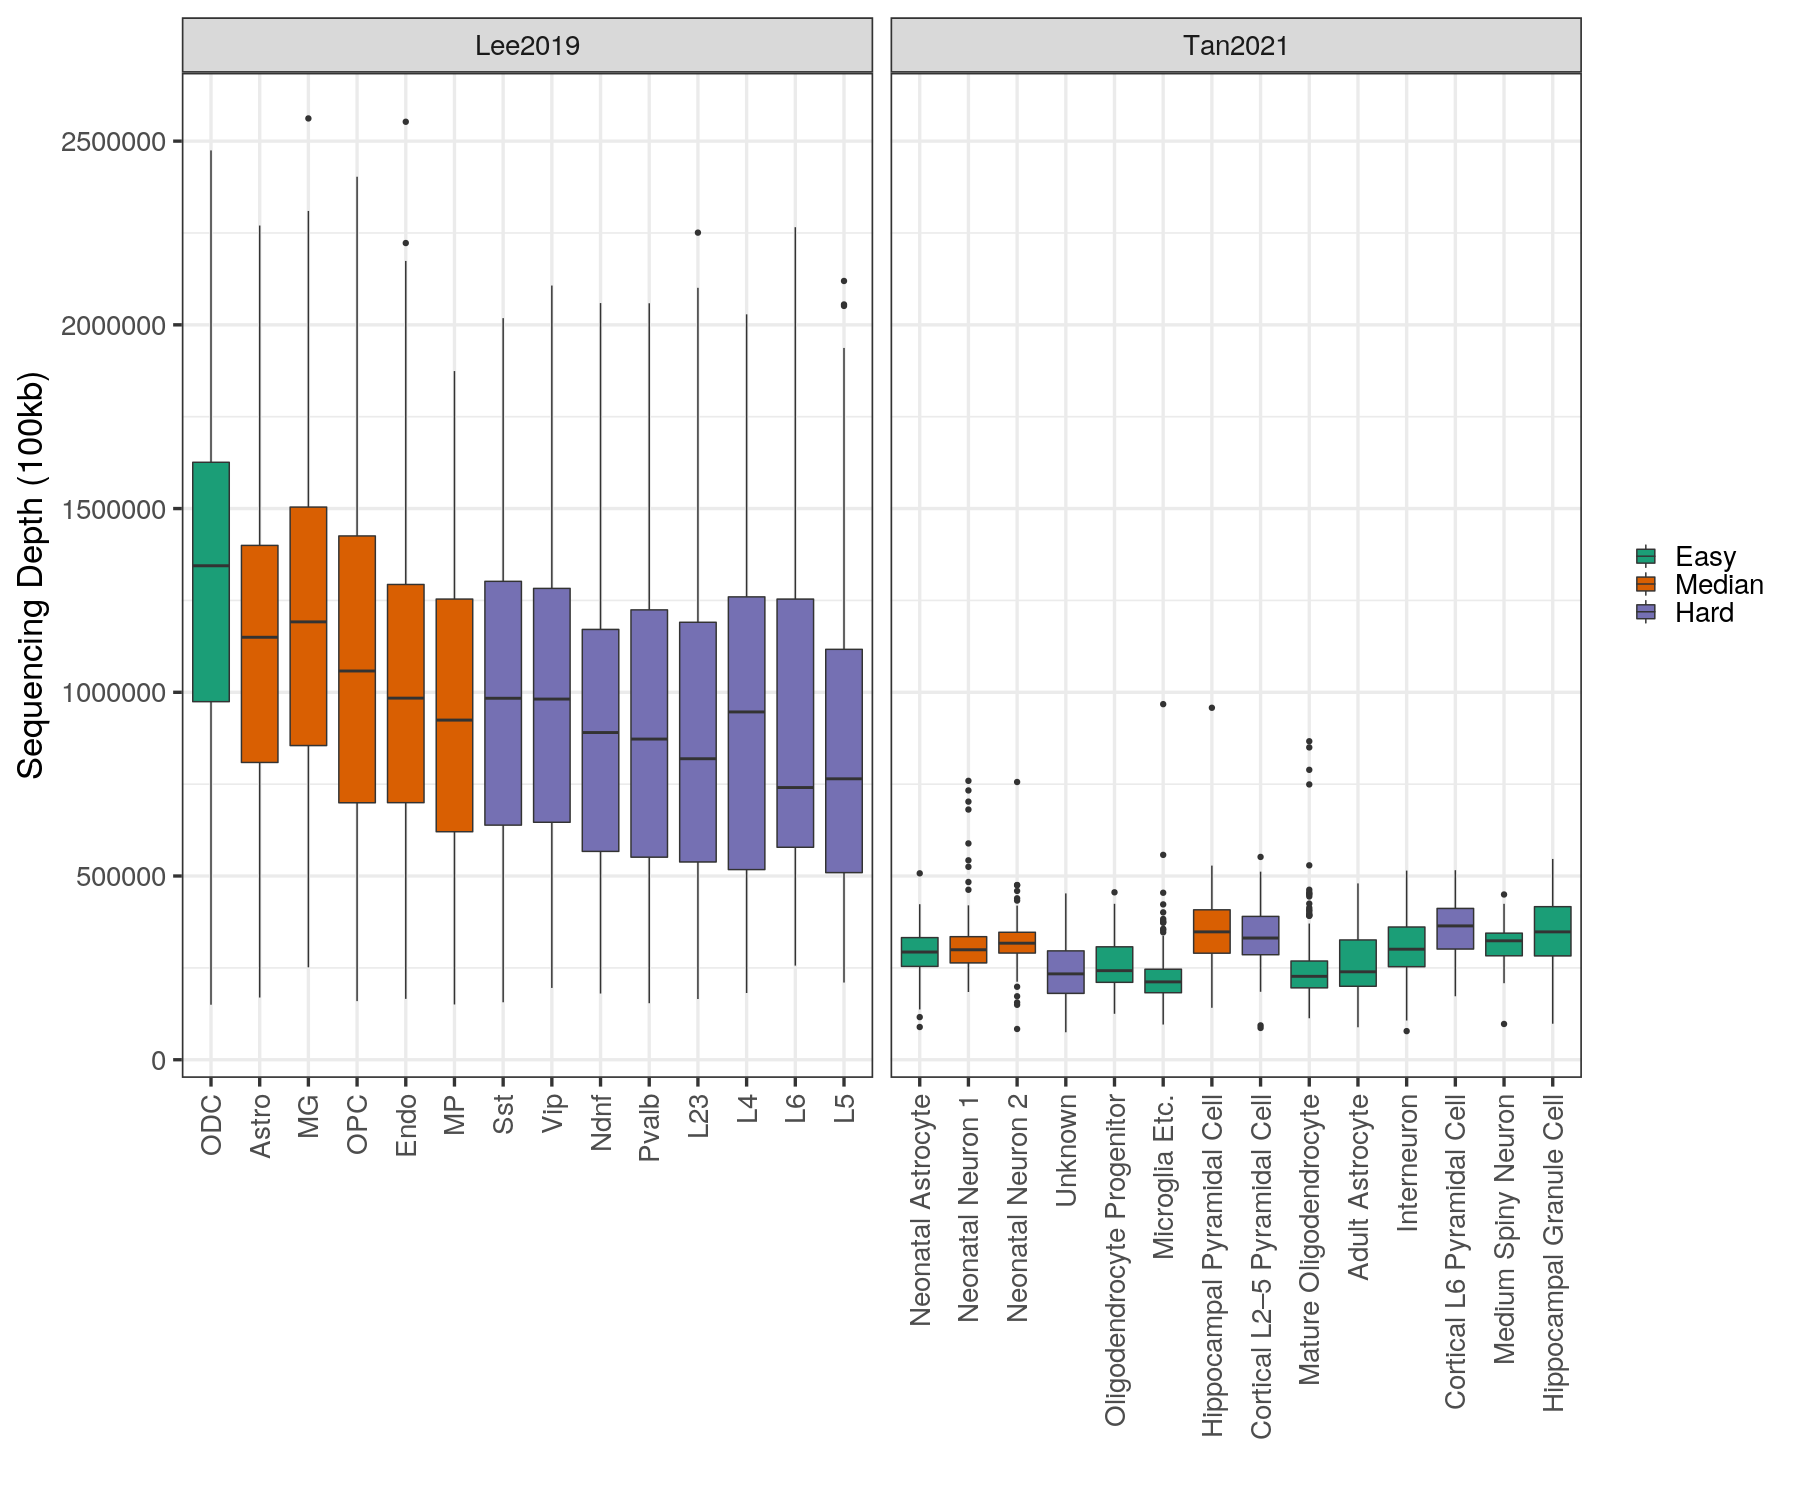

In [27]:
options(repr.plot.width = 18, repr.plot.height = 15, repr.plot.res = 100)

rbind(lee2019_depth$data %>% mutate(datasource = "Lee2019") %>% select(cell_type, depth, classify, datasource),
      tan2021_depth$data %>% mutate(cell_type = V9, depth = V21, datasource = "Tan2021") %>% select(cell_type, depth, classify, datasource)) %>% 
ggplot(aes(x = factor(cell_type, levels = c("ODC", "Astro", "MG", "OPC", "Endo", "MP", "Sst", "Vip", "Ndnf", "Pvalb", "L23", "L4", "L6", "L5", unique(tan2021_sparsity$data$V9))), y = depth, fill = classify)) +
geom_boxplot() +
facet_grid(~datasource, scales = "free", space = "free") +
theme_bw(base_size = 25) +
xlab("") +
ylab("Sequencing Depth (100kb)") +
scale_fill_brewer(palette = "Dark2") + 
rotate_x_text(angle = 90) +

rremove("legend.title")